# -----------------------PUBG Analysis & Prediction-------------------------

## **Domain Overview**  

Gaming analytics involves collecting and analyzing player data to improve performance, balance gameplay, and enhance user experience. In **PUBG**, data such as kills, assists, damage, and movement patterns help predict player performance and match outcomes.  

Machine learning is widely used in gaming for **match outcome prediction, cheat detection, and player behavior analysis**. Your project applies ML models like **Random Forest and Gradient Boosting** to analyze PUBG player data, providing insights into key factors affecting performance and ranking.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

In [4]:
# Load the dataset
df = pd.read_csv('pubg.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
# Display the first few rows of the dataset
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
# Check for missing values
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
# Summary statistics
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


## Feature Engineering

In [11]:
# Step 2: Remove unnecessary columns
columns_to_drop = ['Id', 'groupId', 'matchId', 'matchType', 'maxPlace', 'rankPoints', 'winPoints']
df = df.drop(columns=columns_to_drop)

In [12]:
# Step 3: Sample the data to reduce size (reduce to 5% of the data)
df = df.sample(frac=0.05, random_state=42)  # Adjust the fraction as needed

In [13]:
# Step 4: Prepare the data for modeling
X = df.drop(columns=['winPlacePerc'])
y = df['winPlacePerc']

# Convert winPlacePerc to binary classification (1 if winPlacePerc > 0.5, else 0)
y = (y > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

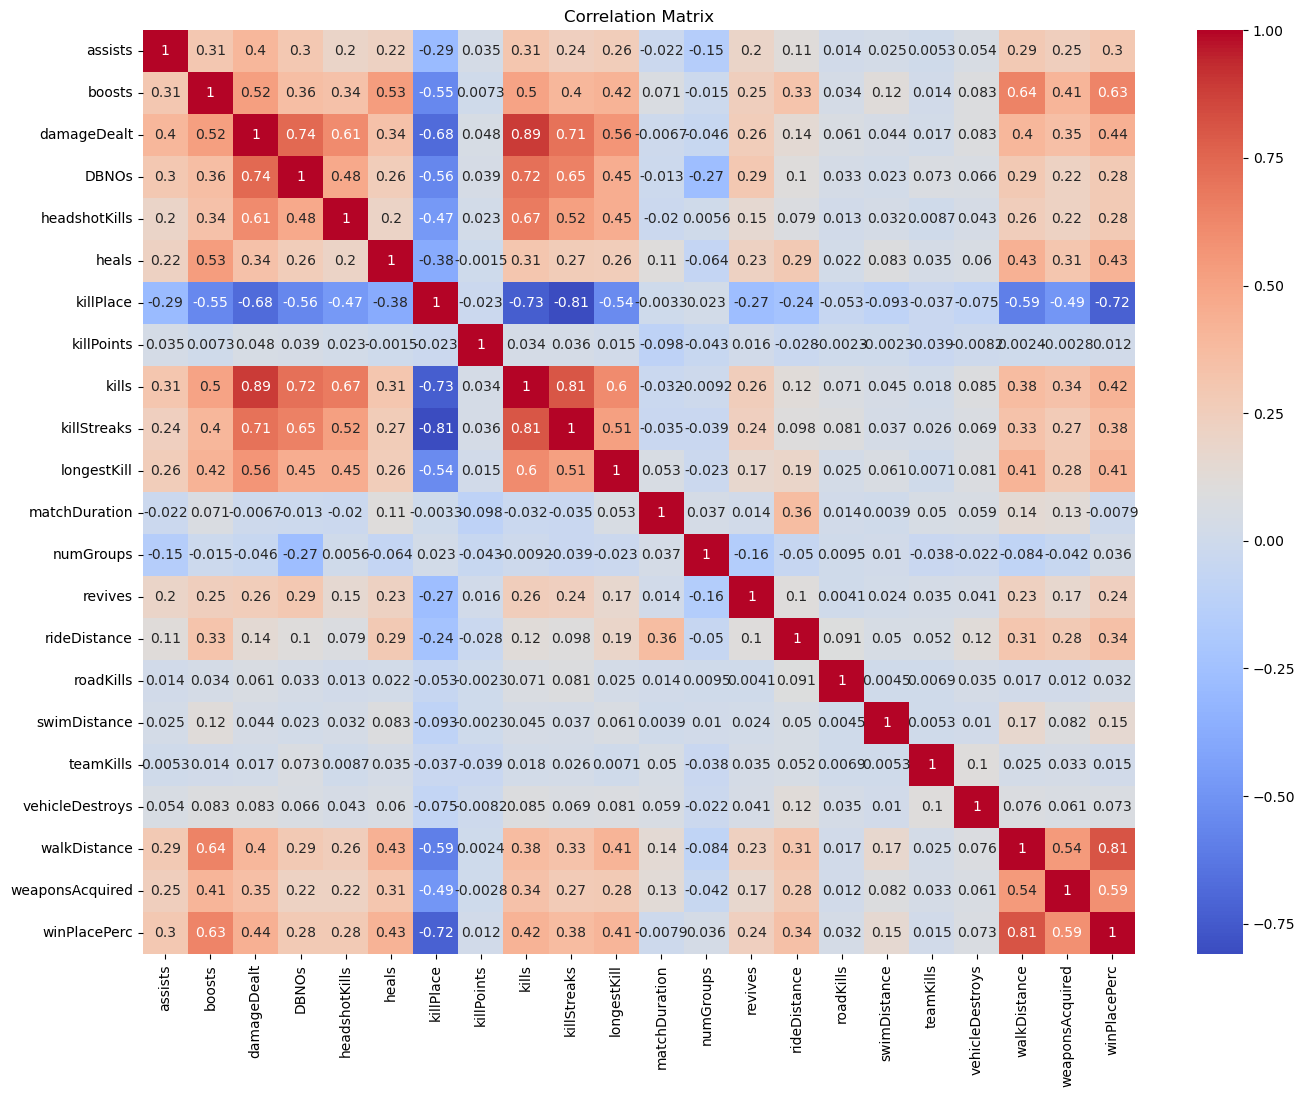

In [14]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

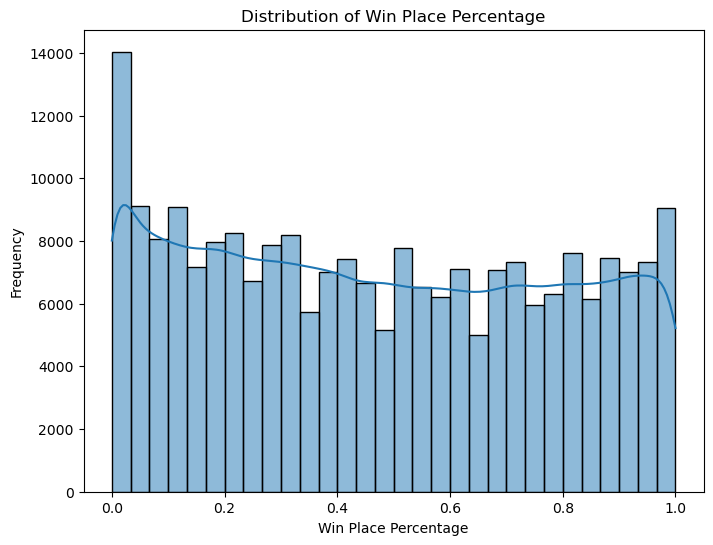

In [15]:
# Distribution of the target variable (winPlacePerc)
plt.figure(figsize=(8, 6))
sns.histplot(df['winPlacePerc'], bins=30, kde=True)
plt.title('Distribution of Win Place Percentage')
plt.xlabel('Win Place Percentage')
plt.ylabel('Frequency')
plt.show()

## Models & Training

In [17]:
# Step 5: Define models and hyperparameter grids
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()}

# Simplified hyperparameter grids
param_grids = {'RandomForest': {'n_estimators': randint(100, 200),
                                'max_depth': [None, 10, 20],
                                'min_samples_split': randint(2, 10), 
                                'min_samples_leaf': randint(1, 5)},
               'GradientBoosting': {'n_estimators': randint(100, 200), 
                                    'learning_rate': [0.01, 0.1],
                                    'max_depth': randint(3, 7),
                                    'min_samples_split': randint(2, 10),
                                    'min_samples_leaf': randint(1, 5)}}

In [18]:
# Step 6: Perform RandomizedSearchCV for each model with reduced iterations and CV folds
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    random_search = RandomizedSearchCV(
        model, 
        param_grids[model_name], 
        n_iter=5,  # Reduced number of iterations
        cv=2,      # Fewer cross-validation folds
        random_state=42, 
        n_jobs=-1)
random_search.fit(X_train, y_train)
best_models[model_name] = random_search.best_estimator_
print(f"Best parameters for {model_name}: {random_search.best_params_}")

Training RandomForest...
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 137}


In [19]:
# Step 7: Evaluate the best models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

GradientBoosting Accuracy: 0.9377
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     24290
           1       0.93      0.93      0.93     20180

    accuracy                           0.94     44470
   macro avg       0.94      0.94      0.94     44470
weighted avg       0.94      0.94      0.94     44470



In [20]:
# Step 8: Select the best model based on accuracy
best_model_name = max(best_models, key=lambda k: accuracy_score(y_test, best_models[k].predict(X_test)))
best_model = best_models[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {accuracy_score(y_test, best_model.predict(X_test)):.4f}")

The best model is GradientBoosting with an accuracy of 0.9377


In [21]:
# Example: Create a new feature 'totalDistance'
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('winPlacePerc', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_scaled
y = df['winPlacePerc']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.007746610043194764


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Use regression model instead
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# Get predictions (continuous values)
y_pred = rf.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions for Regression Model
y_pred = rf.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.0620
R-squared Score (R2): 0.9182


## Feature Importance Analysis

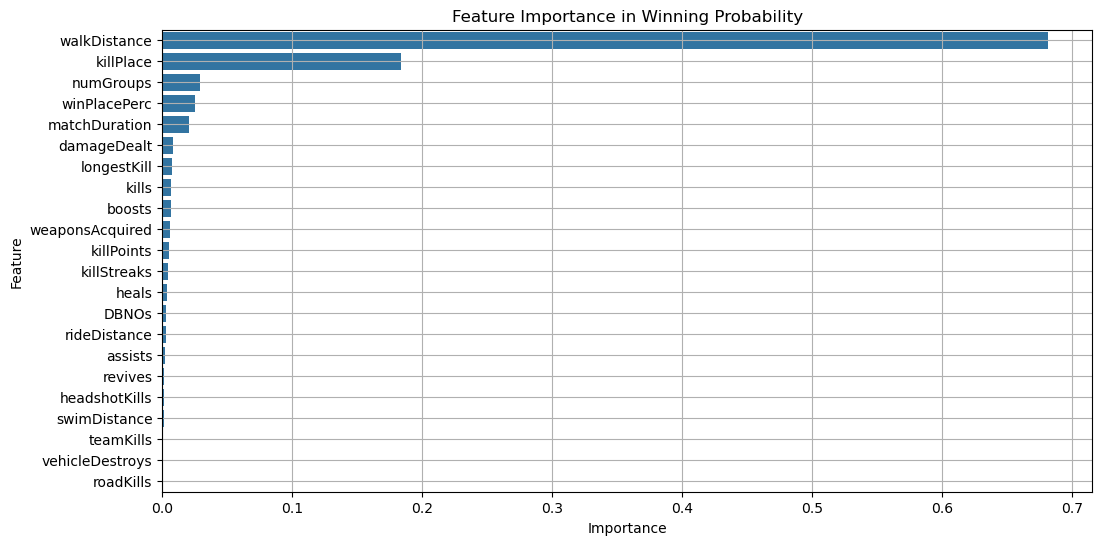

In [29]:
# Get feature importance scores
importances = rf.feature_importances_
features = X.columns

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Winning Probability")
plt.grid(True)

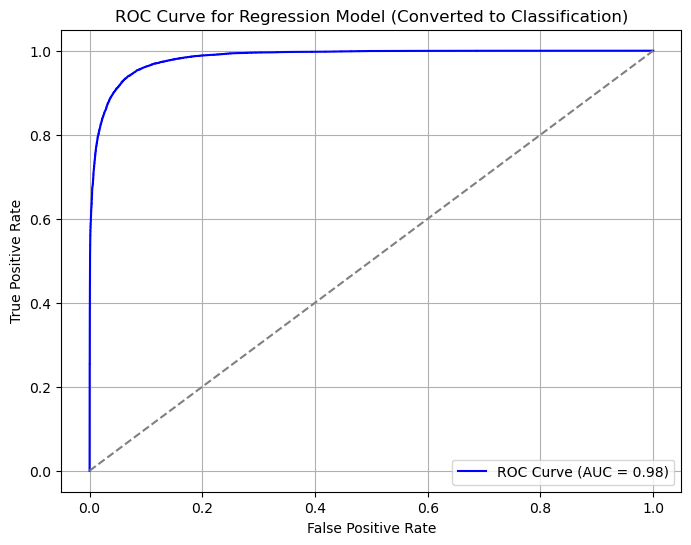

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert continuous winPlacePerc to binary (1 = likely to win, 0 = likely to lose)
threshold = 0.5  # Define a threshold for classification
y_test_binary = (y_test > threshold).astype(int)  # Convert to binary labels
y_pred_binary = (y_pred > threshold).astype(int)  # Convert predictions to binary

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
roc_auc = roc_auc_score(y_test_binary, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Regression Model (Converted to Classification)")
plt.legend()
plt.grid(True)

C:\Users\balaj\AppData\Local\Temp\ipykernel_2968\558099794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Actual_Bins', y='Predicted', data=comparison_df, palette="coolwarm")


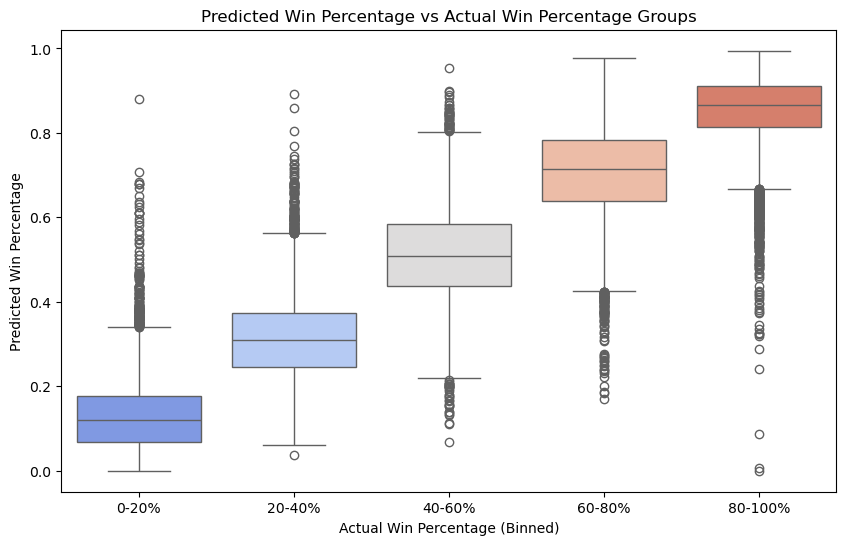

In [68]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Convert actual values into bins (e.g., grouping win percentages)
comparison_df['Actual_Bins'] = pd.cut(comparison_df['Actual'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                                      labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

# Boxplot to show distribution of predicted values within actual win percentage bins
plt.figure(figsize=(10, 6))
sns.boxplot(x='Actual_Bins', y='Predicted', data=comparison_df, palette="coolwarm")
plt.title("Predicted Win Percentage vs Actual Win Percentage Groups")
plt.xlabel("Actual Win Percentage (Binned)")
plt.ylabel("Predicted Win Percentage")
plt.show()

##                                                       CHALLENGES FACED AND SOLUTIONS USED 
**Challenges Faced:**
1. Large Dataset Size : The dataset was too large to process efficiently, so we sampled 5% of the data.
2. Imbalanced Data : The target variable (winPlacePerc) was continuous, so we converted it to a binary classification problem.
3. Hyperparameter Tuning : We used RandomizedSearchCV with reduced iterations and cross-validation folds to speed up the process.
4. Model Selection : We compared multiple models and selected the best one based on accuracy.

**Techniques Used:**
1. Data Sampling : Reduced the dataset size by sampling.
2. Binary Classification : Converted the continuous target variable to binary.
3. RandomizedSearchCV : Used for hyperparameter tuning with reduced iterations and CV folds.
4. Model Comparison : Compared multiple models to select the best one.

## **CONCLUSION**

This project analyzes PUBG player data using machine learning to predict match performance. Feature engineering, model tuning, and evaluation help improve accuracy. Future enhancements can include advanced ML models and real-time analytics for better predictions.